# Introduction to Version Control with GIT

## Introduction

**Version control** is a system which:

- records all files that make up a project (down to the line) over time
- tracks their development
- provides the ability to recall previous versions of files.
- facilitates collaborative editing of files by different parties. 

This type of system is essential for ensuring reproducibility of scientific research

Why should I care obout version control? Probably most of us have at some point in their career (some earlier, some later) come across as situation where they had to write document that evolved over time.It starts out simple, than more and more content comes in, often content needs to be reorganized, certain parts will be deleted or moved to other places. Changes introduced are reverted and changed in a different way etc. More often than not one wishes to travel back in time to an earlier stage in the history of the project. 


There are a number of popular tools for version control, the particular tool we will use is **git**.

A "poor man's version control" system is shown in this directory listing:

```shell
ls ~/poor_VC

paper_final.tex         paper_v2_richard.tex
paper_really_final.tex  paper_v2.tex
paper.tex               paper_v3_with_richards_comments.tex
paper_v1.tex
```

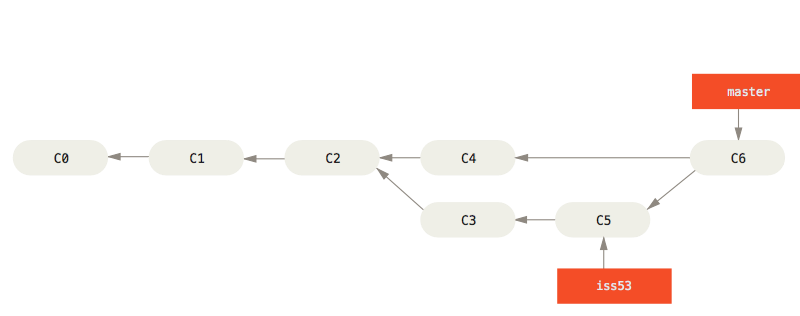  
Source: https://git-scm.com/book/en/v2

The git version control system can be thought of as a iterative workflow where paper documents move between various places:
- The modified state: The document is on our desk before us and we edit (write) it.
- Staged: When our task on the document is done or we have to work on sth else, we put the file into a shelf that has a label "Keep" on it. It can be thought of as a stash of documents that we need to keep within reach but are not actively working on it. From that stash, we can easily pull the document back to our desk and continue working on it.
- Committed: At some point, we would like to take a snapshot of the document, so we can re-open precisely the current state at a later point in time. In a paper world, we would take the stash of documents to the copy machine, make a copy from each document and put the copy into a file cabinet, tagged with a date, our name, and a remark telling us what the change of this copy with respect to the previous copy is. The original document is now in a "unmodified" state (with respect to the last backup copy). 

We then take the document back to our desk and continue working on it: It is then again in the "modified state".
 

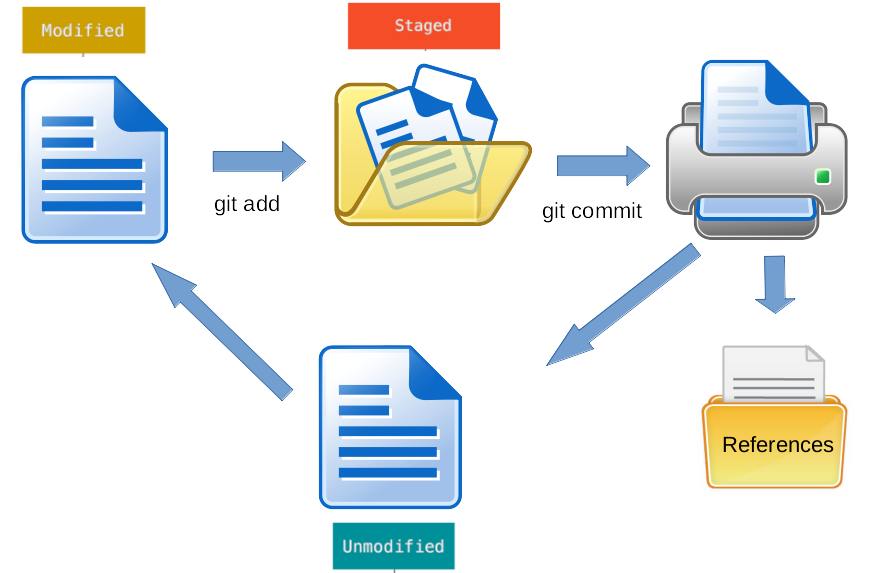

# Setting up git

Initially we need to set up git. 

git keeps track of the entire history of a project. This does not only mean keeping track of what was done but also who did it. So we start by telling git who we are by running the following two commands:

```shell
$ git config --global user.name "Your Name"
$ git config --global user.email "Your Email"
```

**Note** this is not data that is being collected by any cloud service or similar. It just stays with your project.

**Windows**
Note that all these commands work on the anaconda prompt but if you want to use tab completion you can use the git bash command line specifically for git.

# Initialising a git repository

In order to demonstrate how version control with git works we are going to use the `rsd-workshop` folder we created before.

We need tell git to start keeping an eye on this repository (folder/project). While in the `rsd-workshop` directory type:

```shell
$ git init
```

You should then see a message saying that you have successfully initialized a git repository.

# Staging and committing changes

To see the status of the repository we just initialized type:
 
```shell
$ git status
```

We should see something like:

<img src="static/git_status.png" width="600"/>

There are various pieces of useful information here, first of all that `addition.py`, `if-statement.py` and `while-loops.py` are not currently tracked files.

We are now going to track the `addition.py` file:

```shell
$ git add addition.py
```

If we run git status again we see:

<img src="static/git_status_after_add.png" width="600"/> 

We have propagated our file from the "Untracked" to the "Staged" status.  
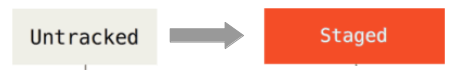

So the `addition.py` file is now ready to be "committed".

```shell
$ git commit
```

When doing this, a text editor should open up prompting you to write what is called a commit message. Your machine will probably have one of the following command line editors set up as a default:

- [Nano](https://www.nano-editor.org)
- [Vim](https://www.vim.org)

For the purposes of using git these are more than sufficient, all you need to know how to do is:

- Write (in Nano: just type, in Vim: press i and type);
- Save (in Nano: Ctrl + O, in Vim: press esc, then :, then w + Enter);
- Quit (in Nano: Ctrl + X, in Vim: press esc, then :, then q + Enter).

**Note** it is possible to set up a different default editor but instructions for this can be machine specific.

For unix you can use the following command:

```shell
$ git config --global core.editor "nano"
```

Type the following as the first commit message:

```shell
Add addition script

Addition script contains a function which adds two numbers.
```

save and exit.

git should confirm that you have successfully made your first commit.


<img src="static/git_commit.png" width="500"/> 


**Note** A commit message is made up of 2 main components:

```shell
<Title of the commit>

<Description of what was done>
```

- The title should be a description in the form of "if this commit is applied `<title of the commit>` will happen". The convention is for this to be rather short and to the point.
- The description can be as long as needed and should be a helpful explanation of what is happening.

A commit is a snapshot that git makes of your project, you should use this at meaningful steps of the progress of a project.

Now, our file is in the "Unmodified" state, because it is identical to the _copy_ that we filed away to our "file cabinet" (the location where git stores the snapshots).

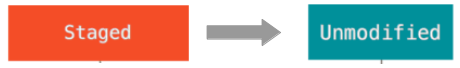

# Ignoring files

There are still two files in the repository that are currently not being tracted. These are `if-statement.py` and `while-loops.py`. 

We do not want to keep tract of those files as they are not related to our project.

To tell git to ignore these files we will add them to a blank file entitled `.gitignore`.

Open your editor and open a new file (`File > New file`) and type:

```shell
if-statement.py
while-loops.py
```

Save that file as `.gitignore` and then run:

```shell
$ git status 
```

We see now that `git` is ignoring those 2 files but is aware of the `.gitignore` file.

Let us add and commit that file:

```shell
$ git add .gigignore
$ git commit
```

Use `Add .gitignore` as the commit message.

Now if we run `git status`, we see a message saying that everything in our repository is tracked and up to date.

# Tracking changes to files


Let's assume that we want to change the function `add_two_numbers` to `add_two_even_numbers`. So that the function can adds two numbers that are even.


Change the file `addition.py` to look like this:

```python
def add_two_even_numbers(a, b):
    if a % 2 == 0 and b % 2 == 0:
        return a + b
    else:
        print("Please use even numbers.")
    
print(add_two_even_numbers(4, 6))
```


Save your file and then run:

```shell
$ git status
```

We now see that git is aware of a change to our file:

<img src="static/modified.png" width="600"/> 

Our file is now in the modified state, as `git status` will tell us.  

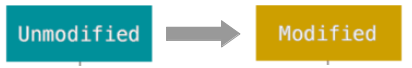

To see what has been modified you need to type:

```shell
$ git diff addition
```
and press `q` to exit.

To "stage" the file for a commit we use git add again:

```shell
$ git add addition
```

Now let us commit:

```shell
$ git commit
```

With the following commit message:

```
Change add two numbers function to add two even numbers
```

Finally, we can check the status: git status to confirm that everything has been done correctly.    

# Exploring history

`git` allows us to see the history of a project and in some cases even change it. To view the history of a repository type:

```shell
$ git log
```

This displays the full log of the project:

<img src="static/git_log.png" width="700"/> 


We see that there are 3 commits there, each with a seemingly random set of numbers and characters. This set of characters is called a "hash".

The first commit with title `adds addition script` has hash: aab73629642568b9be5ca5faa5e091ea9a629d67.

**Note** that on your machines this hash will be different, in fact every hash is mathematically guaranteed to be unique, thus it is uniquely assigned to the changes made.

Hashes can be very useful but we are not going to cover their many uses in this workshop.

# Creating branches

The final part that we will cover in Day I is creating branches. Branches allow us to work in parallel which is very important when developing software, and also when we do research.

When typing `git status` we have seen that one piece of information regularly given was:

```shell
On branch master
```

This is telling us which branch of "history" we are currently on. We can view all branches with the command:

```shell
$ git branch
```

This shows:

```
* master
```



So currently there is only one branch called master. Let us create a new branch called `implement-add-odd-numbers`:

```shell
$ git branch implement-add-odd-numbers
```

When we now type `git branch` we see that 2 branches exist but the active branch is indicated by *:
 
```
implement-add-odd-numbers
* master

```

To move to this new branch the command is:

```shell
$ git checkout implement-add-odd-numbers
```

Run `git branch` and then `git status` to see how this has worked.

While we are on this branch we are going to add a new function in the `addition.py` and that is a function that adds two odd numbers.

Add the following code to `addition.py`:

```python
def add_two_odd_numbers(a, b):
    if a % 2 != 0 and b % 2 != 0:
        return a + b
    print("Please use odd numbers.")

print(add_two_odd_numbers(1, 3))

```

Let us add and commit this:
    
```shell
$ git add addition
$ git commit 
```

Commit message:

```
Implement function for adding odd numbers
```

Let us now return to the master branch.

```shell
$ git checkout master
```

If you open the file `addition.py` you will see that the latest change is not there. That is because this change was done in a different branch.

Branches allow us to bring work from different people done in parallel and merged them to the main branch of the repository. This can be done locally using `git` and also on the cloud using GitHub. This is demonstrated in the material of Day II in the GitHub example.

## Time travel: Checking out a (previous) commit

The `git checkout` commands allows us to revert our file(s) to a state from an earlier commit. Find the commit hash to revert to from `git log` first. Highlight the hash and copy it (Ctrl-C). Then paste into the `git checkout` command. It's actually sufficient to take only the first 8 characters from the hash.

```shell
$ git checkout fbb2cd03
```

The message about "detached HEAD" means that our file(s) have now reverted to a state from an earlier commit. Any changes to our files would not be commited directy
back to our branch (more about branches further below).

The history reported by `git log` now contains only the commits before the checked out commit as you can see by running

```shell
$ git log
```

## Check out the tip of the branch (aka HEAD)

To go back to the "tip of the branch" (the state where we left from before checking out an earlier commit) we run

```shell
$ git checkout master
```

```shell
$ git status
```

```shell
$ git log
```

###  Merging locally
The `git merge` command integrates changes from a branch into the currently checked out branch. Before merging, make sure to have checked out 
the target branch. In our example we merge changes from the "implement-add-odd-numbers" branch into the "master" branch.

```shell
$ git checkout master

Switched to branch 'master'
```

Now use the `git merge` command to bring in the changes from the "implement-add-odd-numbers" branch.
It is good practice to always append the `--no-ff` flag to `git merge` to create a dedicated merge commit. In this way one can later identify changes in the code that are a result from a merge.

```shell
$ git merge implement-add-odd-numbers --no-ff -m "Merge implement-add-odd-numbers"
```

Let's now look at our history. I will append some flags to `git log` here that will visualize the tree-like structure of our history:

```shell
$ git log --pretty=oneline --graph --abbrev-commit
```

### Delete feature branch 
If we are certain that the feature branch `iss53` will no longer be used, we can delete it:

```shell
$ git branch -D implement-add-odd-numbers
```

`git branch` will tell us that master is now our only branch again.

```shell
$ git branch
```